## Neural Network

### 2)Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

## ANSWER:

In [1]:
#Import necessary  libraries
import tensorflow as tf
import numpy as np  # Linear Algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt   # For data visulization purpose
from sklearn.model_selection import train_test_split
import seaborn as sns #For statistical data visulization
sns.set()

In [2]:
#Load the dataset
gas= pd.read_csv("Gas_Turbines.csv")

In [3]:
#Let's view top five rows by using head
gas.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
# view dimensions of dataset
gas.shape

(15039, 11)

In [5]:
# Let's find info about the  data
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


### Statistical analysis of dataset

In [6]:
#Let's describe the dataset
gas.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [7]:
#Correlation
gas.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


#### Normalization function

In [8]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
# Normalized data frame (considering the numerical part of data)
data= norm_func(gas)
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


In [10]:
#Let's describe the dataset
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,0.501126,0.565651,0.698296,0.382549,0.386246,0.829988,0.863370,0.456992,0.424594,0.044716,0.438816
std,0.220141,0.132591,0.197455,0.137637,0.213784,0.165278,0.206153,0.212651,0.213112,0.050387,0.113656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.316383,0.476732,0.564103,0.296296,0.277402,0.788000,0.778826,0.373657,0.331801,0.019447,0.364054
50%,0.513380,0.557394,0.743272,0.379997,0.368982,0.879000,0.981132,0.451505,0.409651,0.031513,0.421558
75%,0.678362,0.642192,0.854608,0.446028,0.476644,0.952000,0.985587,0.547085,0.516478,0.048977,0.501172
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#Let's take dependent and independent
X= data.drop(["TEY"],axis=1)
y = data.TEY

In [12]:
#Let's display top five rows
X.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087


In [13]:
#Let's display top five rows
y.head()

0    0.195191
1    0.195459
2    0.195325
3    0.195459
4    0.195459
Name: TEY, dtype: float64

### splitting the dataset into train test 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [16]:
#Import necessary libraries 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [18]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['MeanSquaredError'])

In [19]:
model.fit(X_train, y_train,validation_split = 0.3, epochs = 40, verbose = 2, batch_size=10)

Epoch 1/40
948/948 - 17s - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 2/40
948/948 - 2s - loss: 7.2568e-04 - mean_squared_error: 7.2568e-04 - val_loss: 3.1421e-04 - val_mean_squared_error: 3.1421e-04
Epoch 3/40
948/948 - 2s - loss: 3.0037e-04 - mean_squared_error: 3.0037e-04 - val_loss: 2.7123e-04 - val_mean_squared_error: 2.7123e-04
Epoch 4/40
948/948 - 2s - loss: 2.6207e-04 - mean_squared_error: 2.6207e-04 - val_loss: 2.3506e-04 - val_mean_squared_error: 2.3506e-04
Epoch 5/40
948/948 - 2s - loss: 2.4569e-04 - mean_squared_error: 2.4569e-04 - val_loss: 2.0635e-04 - val_mean_squared_error: 2.0635e-04
Epoch 6/40
948/948 - 2s - loss: 2.2903e-04 - mean_squared_error: 2.2903e-04 - val_loss: 2.0196e-04 - val_mean_squared_error: 2.0196e-04
Epoch 7/40
948/948 - 2s - loss: 2.1965e-04 - mean_squared_error: 2.1965e-04 - val_loss: 1.9579e-04 - val_mean_squared_error: 1.9579e-04
Epoch 8/40
948/948 - 2s - loss: 2.1098e-04 - mean_squared_error

In [20]:
test_loss, mean_squared_error = model.evaluate(X_test, y_test)

47/47 [==============================] - 0s 2ms/step - loss: 1.6101e-04 - mean_squared_error: 1.6101e-04


In [28]:
# evaluate the model
scores = model.evaluate(X,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 2ms/step - loss: 1.7231e-04 - mean_squared_error: 1.7231e-04
mean_squared_error: 0.02%


In [21]:
#Predictions
predictions = model.predict_on_batch(X_test)

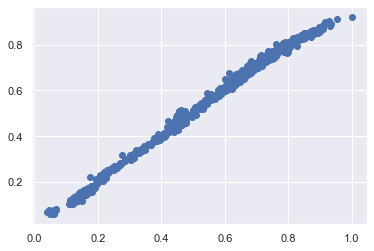

In [22]:
#scattering plot
plt.scatter(y_test, predictions)

In [23]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,0.460639,0.470126,2.059446
1,0.157308,0.167313,6.359943
2,0.450699,0.459819,2.023683
3,0.451639,0.455019,0.748400
4,0.142397,0.138672,2.615902
...,...,...,...
1499,0.439011,0.440952,0.441957
1500,0.334498,0.330863,1.086669
1501,0.816497,0.822903,0.784666
1502,0.442638,0.443023,0.086881


In [24]:
#Check the accuracy of the model
import statsmodels.formula.api as smf 
final = smf.ols('TEY~AT+AP+AH+AFDP+GTEP+TIT+TAT+CDP+CO+NOX',data=data).fit()

In [25]:
final.rsquared, final.aic 

(0.9979317295792114, -96820.75062280589)